# **IMAGENET - ResNet50  - NESNE TANIMA**


---



**Gerekli paketler yükleniyor...**

**ImageNet veriseti ile eğitilmiş model ve ağırlıkları yükleniyor...**

In [1]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

Using TensorFlow backend.


In [2]:
model = ResNet50(weights="imagenet")

102858752/102853048 [==============================] - 3s 0us/step


**Resmi girişe uygun formata getirmek için yeniden boyutlandırma fonksiyonu tanımlanıyor**

In [3]:
def prepare_image(image, target):
	# giriş görüntüsünü yeniden boyutlandırma ve ön işlemerin yapılması
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# işlenmiş görüntüyü alma
	return image

## **Sınıflandırma istediğiniz resmin web adresini aşağıdaki giirş alanına giriniz**

In [9]:
#@title Default title text { vertical-output: true }
ImageURL = "https://imgix.bustle.com/uploads/image/2018/4/9/471897e4-4a04-4373-9112-53c381928d89-shutterstock_1064524748.jpg?w=970&h=582&fit=crop&crop=faces&auto=format&q=70\"" #@param {type:"string"}


**Girilen web adresinden resim indiriliyor**

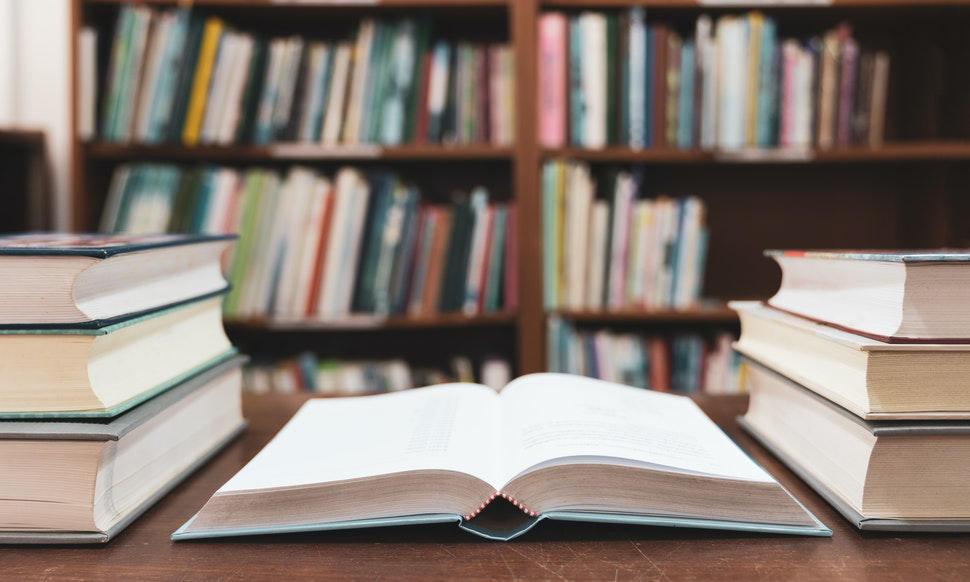

In [10]:
#ImageURL = "https://imgix.bustle.com/uploads/image/2018/4/9/471897e4-4a04-4373-9112-53c381928d89-shutterstock_1064524748.jpg?w=970&h=582&fit=crop&crop=faces&auto=format&q=70
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

**Eğitilmiş model ile sınıflandırma yapılıyor.**

In [11]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 boyutlu hale getir

preds = model.predict(pre_image) # Kesirim modeline ön işlemden geçmiş görüntüyü uygula

results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet veri kümseinden etiket, olasılık ve kestrim sonucunu al
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

{'success': True, 'predictions': [{'label': 'library', 'probability': 0.7784447073936462}, {'label': 'bookshop', 'probability': 0.17000192403793335}, {'label': 'bookcase', 'probability': 0.04767673835158348}, {'label': 'binder', 'probability': 0.0011479912791401148}, {'label': 'comic_book', 'probability': 0.0003761073458008468}]}


In [12]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 
# En yüksek olasılıklı sonucu ekrana yazdır


Sınıflandırma tahmini en yüksek olan 0.7784447073936462 oranıyla library'dır.
